In [3]:
%matplotlib inline

## File input/output: scipy.io

In [4]:
import numpy as np
from scipy import io as spio
a = np.ones((3, 3))
spio.savemat('file.mat', {'a':a})
data = spio.loadmat('file.mat', struct_as_record= True)
data['a']


array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

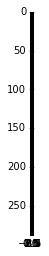

In [5]:
from scipy import misc
misc.imread('red_elephant.png')
import matplotlib.pyplot as plt
plt.imread('red_elephant.png')
plt.imshow(misc.imread('red_elephant.png'))

- Text files: numpy.loadtxt() /numpy.savetxt()
- text/csv: numpy.genfromtxt() / numpy.recfromcsv()
- numpy-specific, binary format: numpy.save()/ numpy.load()

## Special functions: scipy.special
- Besel function: `scipy.special.jn()` (nth integer order Besel function)
- Elliptic function: `scipy.special.ellipj()` (Jacobian elliptic function)
- Gamma function: `scipy.special.gamma()`, `scipy.special.gammaln()`
- Erf, the era under a Gaussian curve: `scipy.special.erf()`

## Linear algebra operations: `scipy.linalg`

#### determinant

In [6]:
from scipy import linalg
arr = np.array([[1, 2], 
               [3, 4]])
linalg.det(arr)

-2.0

In [7]:
linalg.det(np.ones((3,3)))

0.0

In [8]:
linalg.det(np.eye(5))

1.0

#### inverse

In [9]:
arr = np.array([[1,2], 
                [3,4]])
iarr = linalg.inv(arr)
iarr

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [10]:
# computing the inverse of a singular matrix (its determinant is zero) will raise LinAlgError 
np.allclose(np.dot(arr, iarr), np.eye(2))

True

In [11]:
arr = np.arange(9).reshape((3,3)) + np.diag([1,0,1])
uarr, spec, vharr = linalg.svd(arr)

In [12]:
spec

array([ 14.88982544,   0.45294236,   0.29654967])

In [13]:
sarr = np.diag(spec)
svd_mat = uarr.dot(sarr).dot(vharr)
np.allclose(svd_mat, arr)

True

## Fast Fouier transforms: `scipy.fftpack`

In [14]:
time_step = 0.02
period = 5.
time_vec = np.arange(0, 20, time_step)
sig = np.sin(2 * np.pi /period * time_vec) + \
    0.5 * np.random.randn(time_vec.size)

In [16]:
from scipy import fftpack
sample_freq = fftpack.fftfreq(sig.size, d=time_step)
sig_fft = fftpack.fft(sig)
pidxs = np.where(sample_freq > 0)
freqs = sample_freq[pidxs]
power = np.abs(sig_fft)[pidxs]

In [17]:
freq = freqs[power.argmax()]
np.allclose(freq, 1./period)

True

C:\Users\Chao\Anaconda3\lib\site-packages\numpy\core\numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


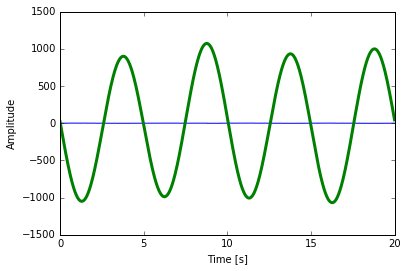

In [18]:
sig_fft[np.abs(sample_freq) > freq] = 0
main_sig = fftpack.fft(sig_fft)
import pylab as plt
plt.figure()
plt.plot(time_vec, sig)
plt.plot(time_vec, main_sig, linewidth=3)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')


### Optimization and fit: `scipy.optimize`

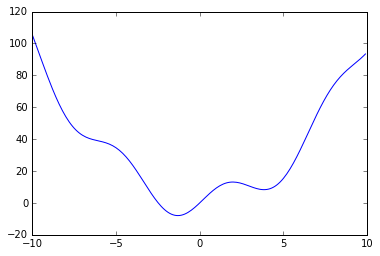

In [20]:
from scipy import optimize
def f(x):
    return x**2 + 10*np.sin(x)

x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x)) 
plt.show() 

In [21]:
optimize.fmin_bfgs(f, 0)

Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 5
         Function evaluations: 24
         Gradient evaluations: 8


array([-1.30644003])

In [22]:
optimize.fmin_bfgs(f, 3, disp=0)

array([ 3.83746663])

In [23]:
optimize.basinhopping(f, 0)  

                        fun: -7.9458233756152845
 lowest_optimization_result:       fun: -7.9458233756152845
 hess_inv: array([[ 0.08577809]])
      jac: array([  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([-1.30644001])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1665
                        nit: 100
                       njev: 555
                          x: array([-1.30644001])

In [24]:
>>> xmin_local = optimize.fminbound(f, 0, 10)
>>> xmin_local  

3.8374671194983834

In [25]:
>>> root = optimize.fsolve(f, 1)  # our initial guess is 1
>>> root

array([ 0.])

In [26]:
>>> root2 = optimize.fsolve(f, -2.5)
>>> root2

array([-2.47948183])

In [28]:
>>> xdata = np.linspace(-10, 10, num=20)
>>> ydata = f(xdata) + np.random.randn(xdata.size)
>>> def f2(x, a, b):
...     return a*x**2 + b*np.sin(x)

>>> guess = [2, 2]
>>> params, params_covariance = optimize.curve_fit(f2, xdata, ydata, guess)
>>> params

array([ 0.99975952,  9.92650854])

## Statistics and random numbers: `scipy.stats`

#### Histogram and probability density function

In [32]:
>>> a = np.random.normal(size=1000)
>>> bins = np.arange(-4, 5)
>>> bins

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [33]:
>>> histogram = np.histogram(a, bins=bins, normed=True)[0]
>>> bins = 0.5*(bins[1:] + bins[:-1])
>>> bins

array([-3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5])

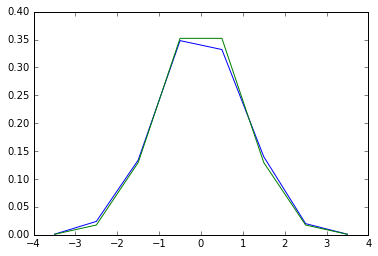

In [35]:
>>> from scipy import stats
>>> b = stats.norm.pdf(bins)  # norm is a distribution

>>> plt.plot(bins, histogram) 
>>> plt.plot(bins, b) 

In [37]:
>>> loc, std = stats.norm.fit(a)
>>> loc, std

(-0.01016932838167362, 0.98885555877479059)

#### Percentiles

In [39]:
np.median(a)

-0.016519619470513072

In [40]:
stats.scoreatpercentile(a, 50)

-0.016519619470513072

#### Statistical tests

- The T statistic value: it is a number the sign of which is proportional to the difference between the two random processes and the magnitude is related to the significance of this difference.
- the p value: the probability of both processes being identical. If it is close to 1, the two process are almost certainly identical. The closer it is to zero, the more likely it is that the processes have different means.

In [41]:
>>> a = np.random.normal(0, 1, size=100)
>>> b = np.random.normal(1, 1, size=10)
>>> stats.ttest_ind(a, b) 

Ttest_indResult(statistic=-3.4417975326474366, pvalue=0.00082294585461813272)

## Interpolation: `scipy.interplate`

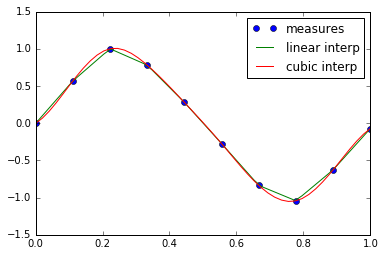

In [44]:
"""Generate the interpolation.png image for the interpolate
section of the Scipy tutorial
"""

import numpy as np
from scipy.interpolate import interp1d
import pylab as pl

measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1) * 1e-1
measures = np.sin(2 * np.pi * measured_time) + noise

linear_interp = interp1d(measured_time, measures)
computed_time = np.linspace(0, 1, 50)
linear_results = linear_interp(computed_time)
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(computed_time)

pl.plot(measured_time, measures, 'o', ms=6, label='measures')
pl.plot(computed_time, linear_results, label='linear interp')
pl.plot(computed_time, cubic_results, label='cubic interp')
pl.legend()


## Numerical integration: `scipy.integrate`

In [45]:
>>> from scipy.integrate import quad
>>> res, err = quad(np.sin, 0, np.pi/2)
>>> np.allclose(res, 1)

True

In [46]:
>>> np.allclose(err, 1 - res)

True

In [47]:
>>> def calc_derivative(ypos, time, counter_arr):
...     counter_arr += 1
...     return -2 * ypos
...


In [49]:
>>> counter = np.zeros((1,), dtype=np.uint16)

>>> from scipy.integrate import odeint
>>> time_vec = np.linspace(0, 4, 40)
>>> yvec, info = odeint(calc_derivative, 1, time_vec,
...                     args=(counter,), full_output=True)

>>> counter

array([129], dtype=uint16)

In [50]:
>>> info['nfe'][:10]

array([31, 35, 43, 49, 53, 57, 59, 63, 65, 69], dtype=int32)

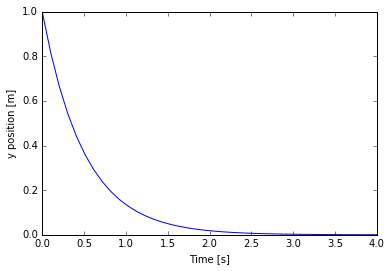

In [51]:
"""Solve the ODE dy/dt = -2y between t = 0..4, with the
initial condition y(t=0) = 1.
"""

import numpy as np
from scipy.integrate import odeint
import pylab as pl

def calc_derivative(ypos, time):
    return -2*ypos

time_vec = np.linspace(0, 4, 40)
yvec = odeint(calc_derivative, 1, time_vec)

pl.plot(time_vec, yvec)
pl.xlabel('Time [s]')
pl.ylabel('y position [m]')



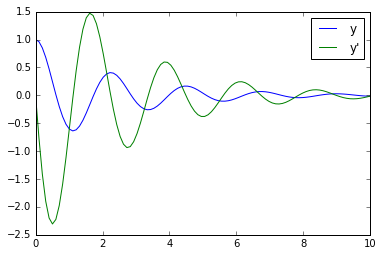

In [54]:
"""Damped spring-mass oscillator
"""

import numpy as np
from scipy.integrate import odeint
import pylab as pl

mass = 0.5
kspring = 4
cviscous = 0.4

nu_coef = cviscous / mass
om_coef = kspring / mass

def calc_deri(yvec, time, nuc, omc):
    return (yvec[1], -nuc * yvec[1] - omc * yvec[0])

time_vec = np.linspace(0, 10, 100)
yarr = odeint(calc_deri, (1, 0), time_vec, args=(nu_coef, om_coef))

pl.plot(time_vec, yarr[:, 0], label='y')
pl.plot(time_vec, yarr[:, 1], label="y'")
pl.legend()



## signal processing: `scipy.signal`

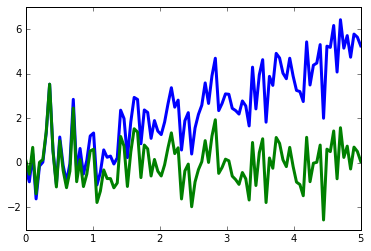

In [57]:
import numpy as np
import pylab as pl
from scipy import signal
t = np.linspace(0, 5, 100)
x = t + np.random.normal(size=100)

pl.plot(t, x, linewidth=3)
pl.plot(t, signal.detrend(x), linewidth=3)

pl.show()

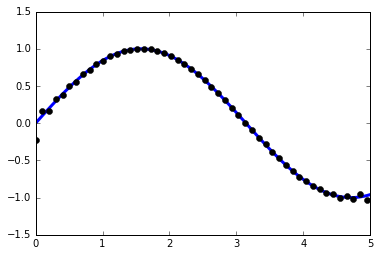

In [58]:
import numpy as np
import pylab as pl
from scipy import signal
t = np.linspace(0, 5, 100)
x = np.sin(t)

pl.plot(t, x, linewidth=3)
pl.plot(t[::2], signal.resample(x, 50), 'ko')

pl.show()

## Image processing: `scipy.ndimage`

In [59]:
from scipy import ndimage

#### Geometrical transformations on images

(-0.5, 1270.5, 1176.5, -0.5)

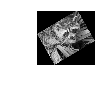

In [64]:
>>> from scipy import misc
>>> face = misc.face(gray=True)
>>> shifted_face = ndimage.shift(face, (50, 50))
>>> shifted_face2 = ndimage.shift(face, (50, 50), mode='nearest')
>>> rotated_face = ndimage.rotate(face, 30)
>>> cropped_face = face[50:-50, 50:-50]
>>> zoomed_face = ndimage.zoom(face, 2)
>>> zoomed_face.shape
>>> plt.subplot(151) 
>>> plt.imshow(shifted_face, cmap=plt.cm.gray)
>>> plt.imshow(shifted_face2, cmap=plt.cm.gray)
>>> plt.imshow(rotated_face, cmap=plt.cm.gray)

>>> plt.axis('off')

#### Image filtering

In [65]:
>>> from scipy import misc
>>> face = misc.face(gray=True)
>>> face = face[:512, -512:]  # crop out square on right
>>> import numpy as np
>>> noisy_face = np.copy(face).astype(np.float)
>>> noisy_face += face.std() * 0.5 * np.random.standard_normal(face.shape)
>>> blurred_face = ndimage.gaussian_filter(noisy_face, sigma=3)
>>> median_face = ndimage.median_filter(noisy_face, size=5)
>>> from scipy import signal
>>> wiener_face = signal.wiener(noisy_face, (5, 5))

(-0.5, 511.5, 511.5, -0.5)

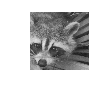

In [66]:
>>> plt.subplot(151) 
>>> plt.imshow(wiener_face, cmap=plt.cm.gray)

>>> plt.axis('off')

#### Mathematical morphology

In [67]:
>>> el = ndimage.generate_binary_structure(2, 1)
>>> el 

array([[False,  True, False],
       [ True,  True,  True],
       [False,  True, False]], dtype=bool)

In [68]:
>>> el.astype(np.int)

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]])

- Erosion

In [74]:
>>> a = np.zeros((7, 7), dtype=np.int)
>>> a[1:6, 2:5] = 1
>>> a

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [75]:
>>> ndimage.binary_erosion(a).astype(a.dtype)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [71]:
>>> #Erosion removes objects smaller than the structure
>>> ndimage.binary_erosion(a, structure=np.ones((5,5))).astype(a.dtype)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

- Dilation

In [72]:
>>> a = np.zeros((5, 5))
>>> a[2, 2] = 1
>>> a

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [73]:
>>> ndimage.binary_dilation(a).astype(a.dtype)

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  1.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

- Opening

In [76]:
>>> a = np.zeros((5, 5), dtype=np.int)
>>> a[1:4, 1:4] = 1
>>> a[4, 4] = 1
>>> a

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 1]])

In [77]:
>>> # Opening removes small objects
>>> ndimage.binary_opening(a, structure=np.ones((3, 3))).astype(np.int)

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0]])

In [78]:
>>> # Opening can also smooth corners
>>> ndimage.binary_opening(a).astype(np.int)

array([[0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0]])

- Closing

In [79]:
>>> a = np.zeros((50, 50))
>>> a[10:-10, 10:-10] = 1
>>> a += 0.25 * np.random.standard_normal(a.shape)
>>> mask = a>=0.5
>>> opened_mask = ndimage.binary_opening(mask)
>>> closed_mask = ndimage.binary_closing(opened_mask)

In [80]:
>>> a = np.zeros((7, 7), dtype=np.int)
>>> a[1:6, 1:6] = 3
>>> a[4, 4] = 2; a[2, 3] = 1
>>> a

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 3, 3, 3, 3, 3, 0],
       [0, 3, 3, 1, 3, 3, 0],
       [0, 3, 3, 3, 3, 3, 0],
       [0, 3, 3, 3, 2, 3, 0],
       [0, 3, 3, 3, 3, 3, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [81]:
>>> ndimage.grey_erosion(a, size=(3, 3))

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 3, 2, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

#### Measurements on images

In [82]:
>>> x, y = np.indices((100, 100))
>>> sig = np.sin(2*np.pi*x/50.) * np.sin(2*np.pi*y/50.) * (1+x*y/50.**2)**2
>>> mask = sig > 1

In [83]:
>>> labels, nb = ndimage.label(mask)
>>> nb

8

In [84]:
>>> areas = ndimage.sum(mask, labels, range(1, labels.max()+1))
>>> areas

array([ 190.,   45.,  424.,  278.,  459.,  190.,  549.,  424.])

In [85]:
>>> maxima = ndimage.maximum(sig, labels, range(1, labels.max()+1))
>>> maxima

array([  1.80238238,   1.13527605,   5.51954079,   2.49611818,
         6.71673619,   1.80238238,  16.76547217,   5.51954079])

In [86]:
>>> ndimage.find_objects(labels==4) 

[(slice(30, 48, None), slice(30, 48, None))]

## Summary exercises on scientific computing